<a href="https://colab.research.google.com/github/ash-myth/ShadowFox/blob/main/delhiaqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("delhiaqi.csv")

In [5]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [6]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [7]:
data.shape

(561, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [9]:
data.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [10]:
data['pm2_5']

,pm2_5
0,169.29
1,182.84
2,220.25
3,252.90
4,266.36
...,...
556,231.15
557,225.08
558,242.49
559,165.67


In [11]:
data[(data['pm2_5'] > 100) & (data['pm10'] > 150)]

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
555,2023-01-24 03:00:00,2136.23,8.16,43.87,4.74,23.37,269.92,344.91,6.90
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54


In [12]:
data.isnull().sum()

,0
date,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


In [13]:
data.dropna(inplace=True)

In [14]:
data.fillna(0, inplace=True)

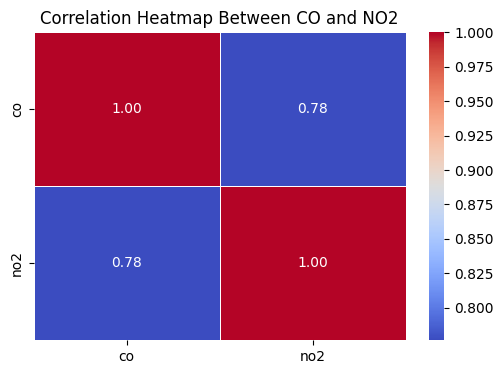

In [15]:
correlation_matrix = data[['co', 'no2']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between CO and NO2')
plt.show()

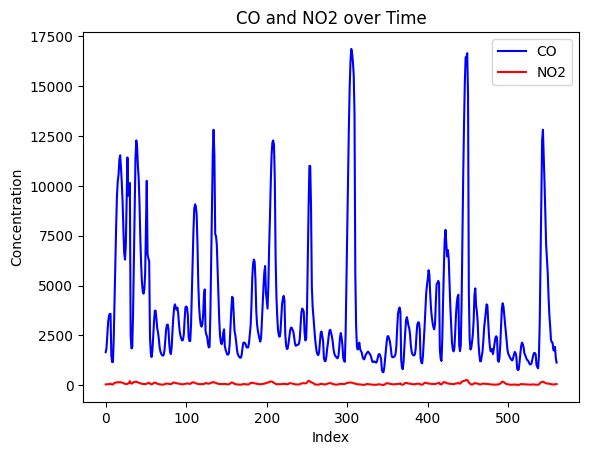

In [16]:
plt.plot(data['co'], label='CO', color='blue')
plt.plot(data['no2'], label='NO2', color='red')
plt.xlabel('Index')
plt.ylabel('Concentration')
plt.title('CO and NO2 over Time')
plt.legend()

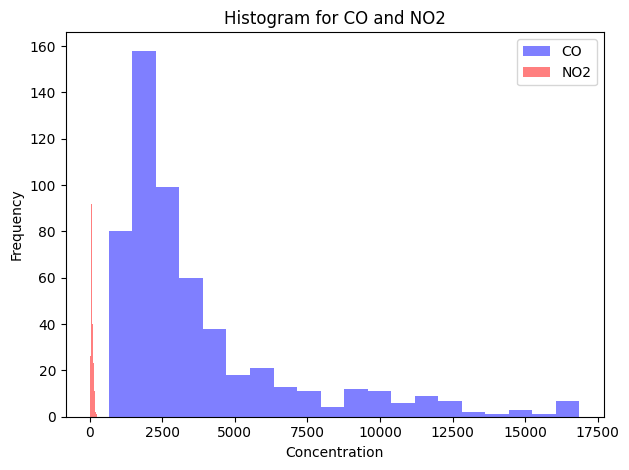

In [17]:
plt.hist(data['co'], bins=20, alpha=0.5, label='CO', color='blue')
plt.hist(data['no2'], bins=20, alpha=0.5, label='NO2', color='red')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.title('Histogram for CO and NO2')
plt.legend()
plt.tight_layout()
plt.show()

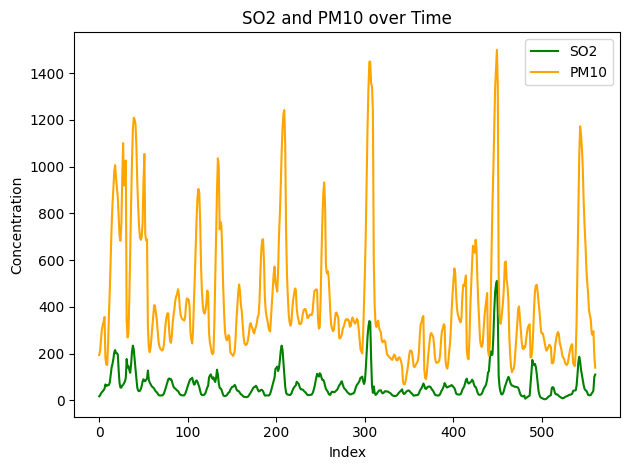

In [18]:
plt.plot(data['so2'], label='SO2', color='green')
plt.plot(data['pm10'], label='PM10', color='orange')

plt.xlabel('Index')
plt.ylabel('Concentration')
plt.title('SO2 and PM10 over Time')
plt.legend()

plt.tight_layout()
plt.show()

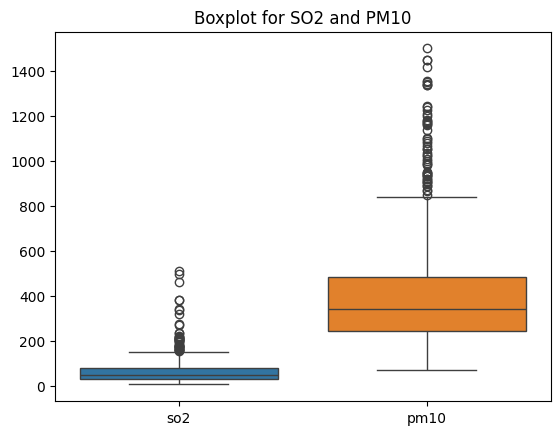

In [19]:
sns.boxplot(data=data[['so2', 'pm10']])
plt.title('Boxplot for SO2 and PM10')
plt.show()

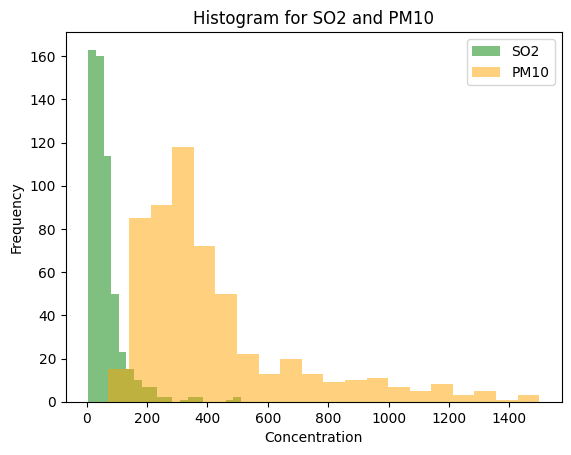

In [20]:
plt.hist(data['so2'], bins=20, alpha=0.5, label='SO2', color='green')
plt.hist(data['pm10'], bins=20, alpha=0.5, label='PM10', color='orange')

plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.title('Histogram for SO2 and PM10')
plt.legend()

plt.show()

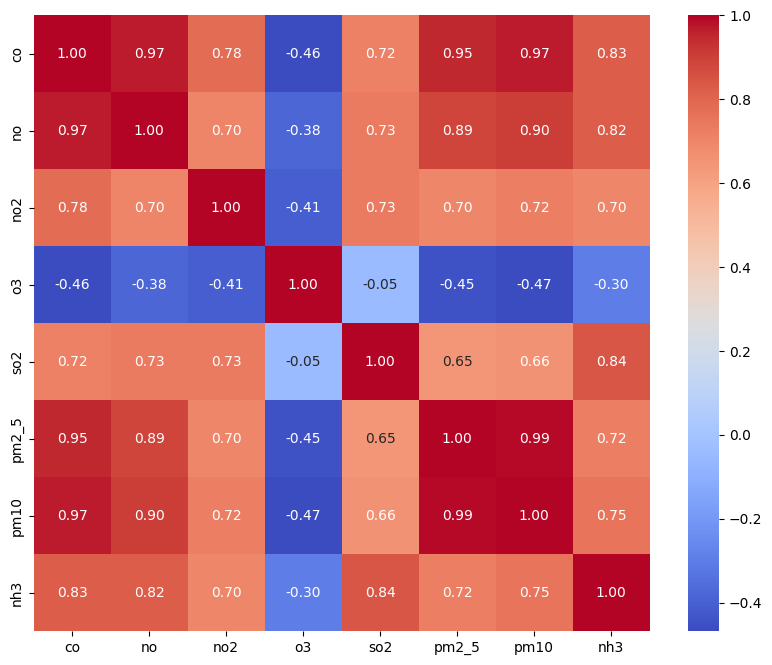

In [21]:
corr = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.show()

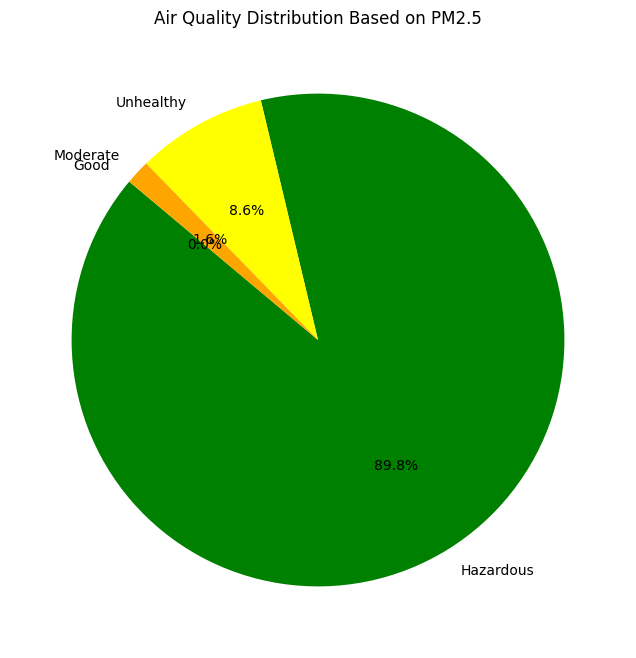

In [22]:
data['air_quality'] = pd.cut(data['pm2_5'],
                           bins=[0, 50, 100, 150, float('inf')],
                           labels=['Good', 'Moderate', 'Unhealthy', 'Hazardous'])
air_quality_counts = data['air_quality'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'orange', 'red'])
plt.title('Air Quality Distribution Based on PM2.5')
plt.show()

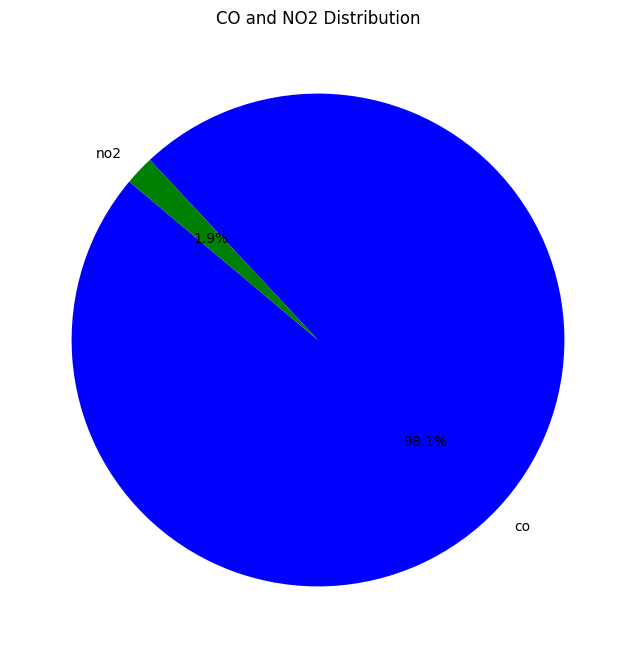

In [23]:
co_no2 = data[['co', 'no2']].sum()
plt.figure(figsize=(8, 8))
plt.pie(co_no2, labels=co_no2.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
plt.title('CO and NO2 Distribution')
plt.show()

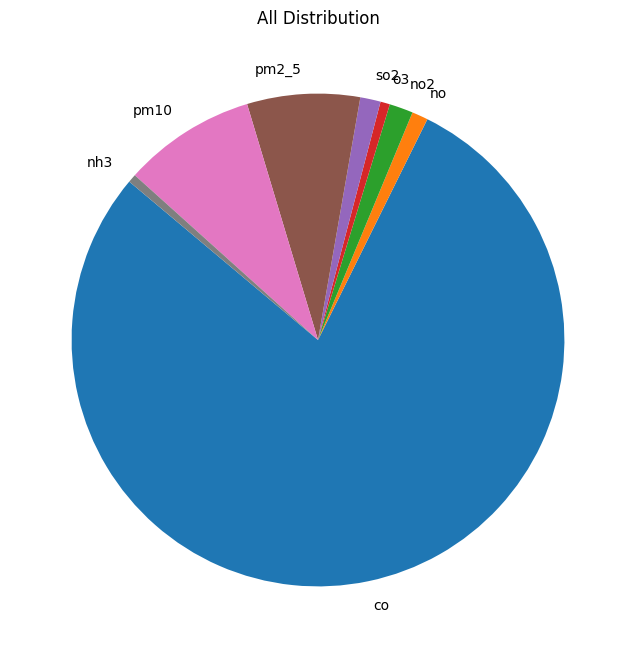

In [24]:
co_no_so2 = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

plt.figure(figsize=(8, 8))
plt.pie(co_no_so2, labels=co_no_so2.index, startangle=140, colors=colors)
plt.title('All Distribution')
plt.show()

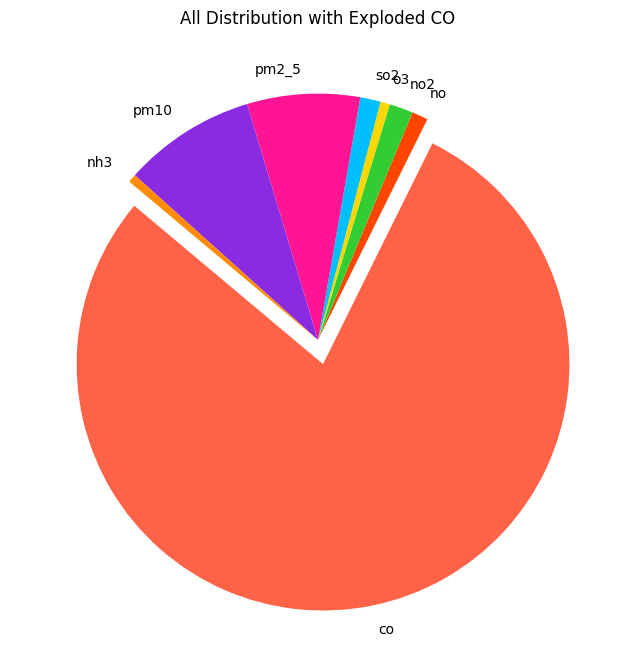

In [25]:
all = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()

colors = ['#FF6347', '#FF4500', '#32CD32', '#FFD700', '#00BFFF', '#FF1493', '#8A2BE2', '#FF8C00']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(all, labels=all.index, startangle=140, colors=colors, explode=explode)
plt.title('All Distribution with Exploded CO')
plt.show()

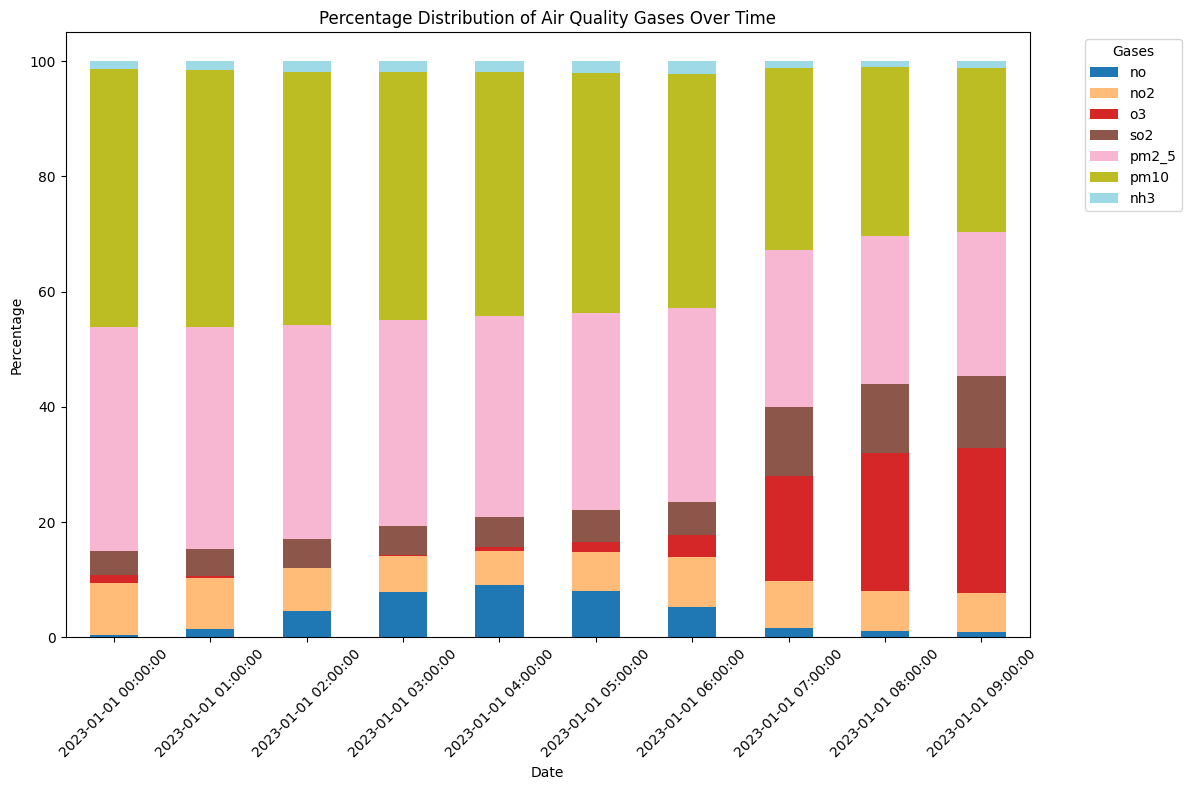

In [26]:

data['date'] = pd.to_datetime(data['date'])
first_10_dates = data.sort_values(by='date').head(10)
daily_sum = first_10_dates.groupby('date')[[ 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()
daily_percentage = daily_sum.div(daily_sum.sum(axis=1), axis=0) * 100
daily_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

plt.title('Percentage Distribution of Air Quality Gases Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
X = data[['co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3']]
y = data['pm2_5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 19.53091165972097


In [30]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 13.218376991150462


In [31]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9895765771664479


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
data['pm2_5_cat'] = data['pm2_5'].apply(lambda x: 0 if x <= 60 else 1 if x <= 120 else 2)

X = data[['co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3']]
y = data['pm2_5_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9911504424778761
Precision: 0.9933628318584071
Recall: 0.9911504424778761
F1 Score: 0.9917623492602277


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

In [37]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)


In [38]:
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lin_reg))
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
print("Linear Regression - RMSE:", np.sqrt(mse_lin_reg))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lin_reg))


Linear Regression - MAE: 0.0867244982334409
Linear Regression - RMSE: 0.1497983772831294
Linear Regression - R²: 0.13172526381728533


In [39]:
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf_reg))
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
print("Random Forest - RMSE:", np.sqrt(mse_rf_reg))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf_reg))

Random Forest - MAE: 0.01504424778761062
Random Forest - RMSE: 0.09289826960484904
Random Forest - R²: 0.6660678787878789
